In [1]:
import h5py

path = "../Network-Parameters/updated_conns/cortex_cortex_edges.h5"
edge = h5py.File(path)
edge.keys()

<KeysViewHDF5 ['edges']>

In [2]:
edge['edges'].keys()

<KeysViewHDF5 ['cortex_cortex']>

In [3]:
network = 'cortex_cortex'
edge['edges'][network].keys()

<KeysViewHDF5 ['0', '1', 'edge_group_id', 'edge_group_index', 'edge_type_id', 'indices', 'source_node_id', 'target_node_id']>

In [4]:
edge['edges'][network]["0"].keys()

<KeysViewHDF5 ['sec_id', 'sec_x', 'syn_weight']>

In [7]:
from bmtool.util.util import load_nodes_from_config

nodes = load_nodes_from_config("../Network-Parameters/simulation_config_baseline.json")

In [10]:
df = nodes['cortex']
PN_cells = df[df['pop_name'] == 'PN']
FSI_cells = df[df['pop_name'] == 'FSI']
LTS_cells = df[df['pop_name'] == 'LTS']
PN_cells.index

UInt64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             8690, 8691, 8692, 8693, 8694, 8695, 8696, 8697, 8698, 8699],
            dtype='uint64', name='node_id', length=8700)

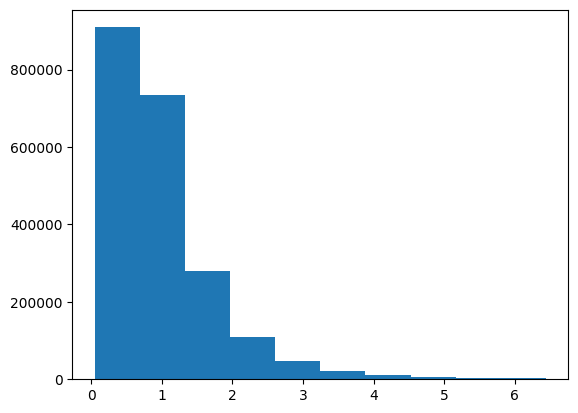

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

weights = edge['edges'][network]["0"]['syn_weight'][:]
source_id = edge['edges'][network]['source_node_id'][:]
target_id = edge['edges'][network]['target_node_id'][:]

source_cell = PN_cells
target_cell = PN_cells
pair_weights = []
for i in range(len(weights)):
    if source_id[i] in source_cell.index and  target_id[i] in target_cell.index:
            pair_weights.append(weights[i])


_ = plt.hist(weights)


Weight look correct thats good 